# Proportion of reads mapping back to ORFs

In [118]:
%matplotlib inline
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [119]:
def parse_mapped_read_stats(rpkm):
    """
    Parse BBMap RPKM output file for basic mapping stats.
    """
    with open(rpkm) as f:
        reads_file = f.readline().strip().split()[1]
        reads = int(f.readline().strip().split()[1])
        mapped = int(f.readline().strip().split()[1])
        refseqs = int(f.readline().strip().split()[1])
        return reads_file, reads, mapped, refseqs               

In [120]:
rpkm_files = glob("/home/ctmr/projects/labcore/seq_depth/nextflow_output/metagenemark_contigs/*rpkm*")
mapped_read_stats = [parse_mapped_read_stats(fn) for fn in rpkm_files]
stats = pd.DataFrame(mapped_read_stats, columns=["Reads_file", "Reads", "Mapped_reads", "Refseqs"])
stats.head()

,Reads_file,Reads,Mapped_reads,Refseqs
0,biopsy_10000reads_1rep_1.fastq.gz,20000,45,19
1,saliva_100000reads_3rep_1.fastq.gz,200000,8071,1580
2,faeces_1000000reads_3rep_1.fastq.gz,2000000,1009241,61714
3,vag_10000reads_3rep_1.fastq.gz,20000,49,15
4,vag_10000000reads_2rep_1.fastq.gz,20000000,14267618,169647


In [121]:
stats["Proportion"] = stats["Mapped_reads"] / stats["Reads"]
stats["Sample_type"] = stats["Reads_file"].str.split("_", expand=True)[0]

In [171]:
sample_type_color = {st: idx for idx, st in enumerate(set(stats["Sample_type"]))}
cmap = plt.cm.get_cmap('viridis', 4)
colors = [cmap(sample_type_color[st]) for st in stats["Sample_type"]]

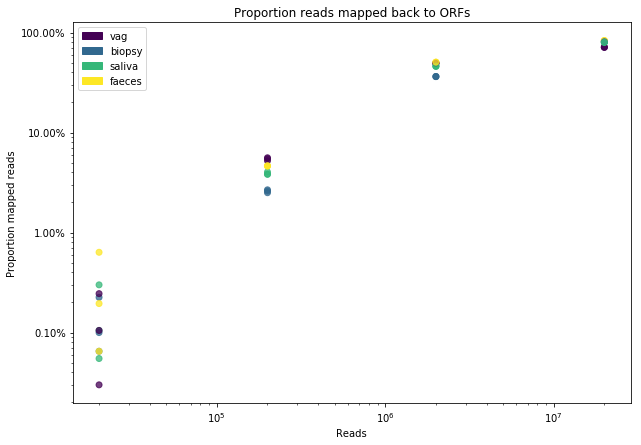

In [173]:
fig, ax = plt.subplots(figsize=(10,7))
stats.plot.scatter(x="Reads", y="Proportion", ax=ax, c=colors, s=6**2, alpha=0.75, logy=True, logx=True)
_ = ax.set_title("Proportion reads mapped back to ORFs")
_ = ax.set_xlabel("Reads")
_ = ax.set_ylabel("Proportion mapped reads")
_ = ax.set_yticklabels(["{:3.2f}%".format(y*100) for y in ax.get_yticks()])

patches = [mpatches.Patch(color=cmap(sample_type_color[st]), label=st) for st in set(stats["Sample_type"])]
ax.legend(handles=patches)

fig.savefig("tigrfam_assembled_orfs/Proportion_reads_mapped_to_ORFs.png")
fig.savefig("tigrfam_assembled_orfs/Proportion_reads_mapped_to_ORFs.pdf")